In [1]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all, predict

In [2]:
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, 
                max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_every = n_iters/100.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_iters, max_length, 
        print_every=n_iters/25., plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours,
        clip = clip)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


Data files preprocessed ...

28 inputs constructed for training ...

0m 7s (- 2m 59s) (60 4%) 4.2522
0m 14s (- 2m 44s) (120 8%) 3.7796
0m 20s (- 2m 33s) (180 12%) 3.2793
0m 28s (- 2m 28s) (240 16%) 2.9184
0m 36s (- 2m 24s) (300 20%) 2.5222
0m 43s (- 2m 19s) (360 24%) 2.2355
0m 51s (- 2m 13s) (420 28%) 1.9146
0m 59s (- 2m 6s) (480 32%) 1.7362
1m 8s (- 2m 0s) (540 36%) 1.6497
1m 15s (- 1m 53s) (600 40%) 1.3883
1m 23s (- 1m 46s) (660 44%) 1.1400
1m 31s (- 1m 39s) (720 48%) 1.1259
1m 39s (- 1m 32s) (780 52%) 0.8977
peak in loss diagram: 
iter 828
 current loss 2.0559916904994417
avg prev loss 0.6713554637830134
tensor([[   8],
        [  33],
        [  13],
        [  50],
        [  11],
        [  92],
        [  18],
        [  79],
        [ 102],
        [  86],
        [  11],
        [  78],
        [  35],
        [  92],
        [  35],
        [  56],
        [  36],
        [  51],
        [  14],
        [  68],
        [  92],
        [  63],
        [   8],
        [  39],
 

2m 8s (- 1m 0s) (1020 68%) 0.5236
peak in loss diagram: 
iter 1036
 current loss 1.7833259582519532
avg prev loss 0.45707855946822384
tensor([[   8],
        [  33],
        [  13],
        [  50],
        [  11],
        [  92],
        [  18],
        [  79],
        [ 102],
        [  86],
        [  11],
        [  78],
        [  35],
        [  92],
        [  35],
        [  56],
        [  36],
        [  51],
        [  14],
        [  68],
        [  92],
        [  63],
        [   8],
        [  39],
        [  78],
        [  38],
        [  28],
        [   6],
        [  18],
        [  79],
        [ 102],
        [  52],
        [   1]])
tensor([[  3],
        [ 19],
        [ 80],
        [ 87],
        [  7],
        [ 32],
        [ 22],
        [ 57],
        [ 22],
        [ 51],
        [  7],
        [ 55],
        [ 50],
        [ 84],
        [ 14],
        [ 67],
        [ 24],
        [ 36],
        [ 67],
        [ 10],
        [ 22],
        [ 51],
       

2m 42s (- 0m 22s) (1320 88%) 0.2452
peak in loss diagram: 
iter 1368
 current loss 0.4346448625837054
avg prev loss 0.16449464664968794
tensor([[   8],
        [   9],
        [  10],
        [   6],
        [ 105],
        [  92],
        [  63],
        [   8],
        [  84],
        [  85],
        [  59],
        [  15],
        [  38],
        [  41],
        [  23],
        [  92],
        [  70],
        [  49],
        [  26],
        [  25],
        [ 102],
        [  11],
        [  92],
        [  23],
        [  96],
        [  37],
        [  13],
        [  47],
        [  92],
        [  54],
        [  35],
        [  16],
        [  80],
        [   8],
        [  54],
        [   4],
        [  73],
        [  49],
        [ 104],
        [  52],
        [   1]])
tensor([[  3],
        [  7],
        [  8],
        [  5],
        [ 92],
        [ 29],
        [ 54],
        [  3],
        [ 48],
        [ 14],
        [ 10],
        [ 16],
        [ 30],
        [ 70

<Figure size 432x288 with 0 Axes>

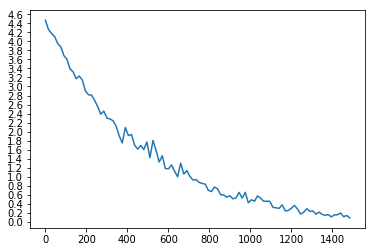

Losses diagram saved in TODO
Models saved in TODO

28 inputs constructed for testing ...

28 outputs predicted ...

Predictions written to ../output/toy.preprocessed-test.predicted.postprocessed.en
Blue score written to ../output/toy.preprocessed-test.BLEU


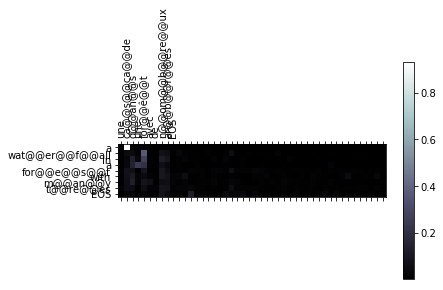

une ca@@s@@ca@@de d@@an@@s une for@@ê@@t avec de n@@om@@b@@re@@ux ar@@b@@r@@es EOS                                    
une ca@@s@@ca@@de d@@an@@s une for@@ê@@t avec de n@@om@@b@@re@@ux ar@@b@@r@@es EOS                                    
a wat@@er@@f@@all in a for@@e@@s@@t with m@@an@@y t@@re@@es EOS
a wat@@er@@f@@all in a for@@e@@s@@t with m@@an@@y t@@re@@es EOS


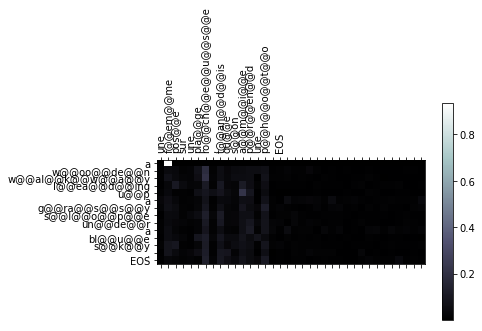

une f@@em@@me pos@@e sur une pla@@ge ro@@ch@@e@@u@@s@@e , t@@an@@d@@is qu@@e s@@on a@@m@@i@@e p@@r@@en@@d une p@@h@@o@@t@@o . EOS                   
une f@@em@@me pos@@e sur une pla@@ge ro@@ch@@e@@u@@s@@e , t@@an@@d@@is qu@@e s@@on a@@m@@i@@e p@@r@@en@@d une p@@h@@o@@t@@o . EOS                   
a w@@oo@@de@@n w@@al@@k@@w@@a@@y l@@ea@@d@@ing u@@p a g@@ra@@s@@s@@y s@@l@@o@@p@@e un@@de@@r a bl@@u@@e s@@k@@y . EOS
a w@@oo@@de@@n w@@al@@k@@w@@a@@y l@@ea@@d@@ing u@@p a g@@ra@@s@@s@@y s@@l@@o@@p@@e un@@de@@r a bl@@u@@e s@@k@@y . EOS


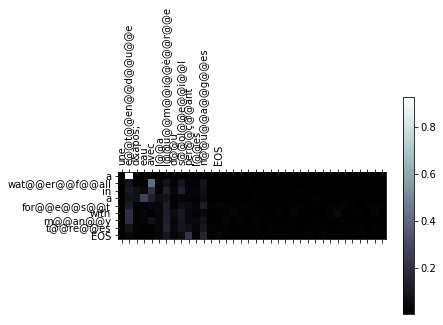

une é@@t@@en@@d@@u@@e d&apos; eau avec l@@a l@@u@@m@@i@@è@@r@@e d@@u s@@ol@@e@@i@@l per@@ç@@ant l@@es n@@u@@a@@g@@es . EOS                      
une é@@t@@en@@d@@u@@e d&apos; eau avec l@@a l@@u@@m@@i@@è@@r@@e d@@u s@@ol@@e@@i@@l per@@ç@@ant l@@es n@@u@@a@@g@@es . EOS                      
a wat@@er@@f@@all in a for@@e@@s@@t with m@@an@@y t@@re@@es EOS
a wat@@er@@f@@all in a for@@e@@s@@t with m@@an@@y t@@re@@es EOS
Attention diagrams saved in TODO


In [4]:
#### TOY DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 1500
max_hours = 9
clip = 20

MAX_LENGTH = 24
(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 80, vocab_threshold = 1,
    padding = False)


In [ ]:
#### TUTORIAL DATA - no BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 2


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = False, num_operations = 200, vocab_threshold = 2,
    padding = False)

In [ ]:
#### TUTORIAL DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 9


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 200, vocab_threshold = 2,
    padding = False)


In [ ]:
#### TRAIN and TEST DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 300000
max_hours = 10
clip = 8
use_bpe = True
replace_unknown_words = True
padding = False
MAX_LENGTH = 17

(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = True, num_operations = 400, vocab_threshold = 5, 
    padding = False)


In [ ]:
#### TRAIN and TEST DATA no BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 80000
max_hours = 8

MAX_LENGTH = 25
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = False, 
    padding = False)


In [ ]:
import filepaths as fp
import data_preparation as dp

from plots import showLosses, showAttention
from data_processing import preprocess, postprocess

def sanity_check(spath_train, tpath_train, 
        spath_test, tpath_test, 
        fn_train, fn_predict_all,
        max_sentence_length = 50, 
        replace_unknown_words = True, 
        use_bpe = True, num_operations = 400, vocab_threshold = 5,
        padding = True):

    # data preprocessing
    (spath_train_pp, tpath_train_pp, spath_test_pp, tpath_test_pp) = preprocess(
        spath_train, tpath_train, spath_test, tpath_test, 
        max_sentence_length,
        replace_unknown_words, 
        use_bpe, num_operations, vocab_threshold)

    print (f'Data files preprocessed ...')
    print ()
    
    # data structures for training
    (slang, tlang, index_array_pairs, s_index_arrays_test, max_bpe_length) = dp.prepare_data(
        spath_train_pp, tpath_train_pp, spath_test_pp, padding)
        
    return slang, tlang, index_array_pairs, max_bpe_length



In [ ]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 300000
max_hours = 10
clip = 8
use_bpe = True
replace_unknown_words = True
padding = False

MAX_LENGTH = 17
slang, tlang, index_array_pairs, max_bpe_length = sanity_check(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    sanity_ckeck, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = replace_unknown_words, 
    use_bpe = use_bpe, 
    padding = padding)


In [ ]:
for i in [0,1, 10000, 20000, 28317, 28318]:
    print(dp.sentenceFromIndexes(slang, index_array_pairs[i][0]))
    print(dp.sentenceFromIndexes(tlang, index_array_pairs[i][1]))
    print()

In [4]:
#encoder, attn_decoder, slang, tlang

EncoderRNN(
  (embedding): Embedding(114, 256)
  (gru): GRU(256, 256)
)

In [128]:
import data_preparation as dp

s_sentence = 'une a@@ b@@ e@@ il@@ le pl@@ an@@ ant a@@ u@@ -@@ de@@ s@@ su@@ s de f@@ l@@ e@@ ur@@ s v@@ i@@ ol@@ e@@ t@@ t@@ es et or@@ an@@ g@@ es .'
s_words = s_sentence.split(' ')
s_indices = dp.indexesFromSentence(
    slang, 
    s_sentence
)

t, a = predict(
        encoder, attn_decoder, s_indices, max_bpe_length)

t_words = dp.wordsFromIndexes(tlang,t)
A = a.numpy() # 19 output * 60 input

In [97]:
s_sentence.replace('@@ ', '')

'une abeille planant au-dessus de fleurs violettes et oranges .'

In [130]:
import numpy as np

merge_indices = [i for i, w in enumerate(s_words) if w.endswith('@@')]
resulting_columns = []
merge_column = np.array([])
resulting_words = []
merge_word = ''
for i, column in enumerate(A.T):
    if not merge_column.any():
        merge_column = column
        merge_word = s_words[i] if i < len(s_words) else ''
    else:
        merge_column = (merge_column + column)
        merge_word += s_words[i]
    if i not in merge_indices:
        resulting_words.append(merge_word)
        resulting_columns.append(merge_column)
        merge_column = np.array([])

In [131]:
resulting_words

['une',
 'a@@b@@e@@il@@le',
 'pl@@an@@ant',
 'a@@u@@-@@de@@s@@su@@s',
 'de',
 'f@@l@@e@@ur@@s',
 'v@@i@@ol@@e@@t@@t@@es',
 'et',
 'or@@an@@g@@es',
 '.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [132]:
X = np.column_stack(resulting_columns)
X.shape

(19, 35)

In [133]:
merge_indices = [i for i, w in enumerate(t_words) if w.endswith('@@')]
resulting_rows = []
merge_row = np.array([])
resulting_words = []
merge_word = ''
for i, row in enumerate(X):
    if not merge_row.any():
        merge_row = row
        merge_word = t_words[i] if i < len(t_words) else ''
    else:
        merge_row = (merge_row + row)/2.
        merge_word += t_words[i]
    if i not in merge_indices:
        resulting_words.append(merge_word)
        resulting_rows.append(merge_row)
        merge_row = np.array([])

In [134]:
len(resulting_rows)

9

In [135]:
resulting_words

['a',
 'wat@@er@@f@@all',
 'in',
 'a',
 'for@@e@@s@@t',
 'with',
 'm@@an@@y',
 't@@re@@es',
 'EOS']

In [137]:
sum(resulting_rows[5])

0.999999986961484

In [ ]:
resulting_rows = []
merge_row = np.array([])
for i, row in enumerate(A):
    if i > len(merge_indices):
        break    
    if not merge_column.any():
        merge_column = column
    else:
        merge_column = (merge_column + column)/2.
    if i not in merge_indices:
        resulting_columns.append(merge_column)
        merge_column = np.array([])

In [139]:
mj = np.column_stack(resulting_columns)

In [140]:
mj.shape

(19, 35)

In [142]:
sum(mj[5])

1.0000000128056854

In [147]:
def merge_bpe_s(s_words, A):
    merge_indices = [i for i, w in enumerate(s_words) if w.endswith('@@')]
    resulting_columns = []
    merge_column = np.array([])
    resulting_words = []
    merge_word = ''
    for i, column in enumerate(A.T):
        if not merge_column.any():
            merge_column = column
            merge_word = s_words[i] if i < len(s_words) else ''
        else:
            merge_column = (merge_column + column)
            merge_word += s_words[i]
        if i not in merge_indices:
            resulting_words.append(merge_word)
            resulting_columns.append(merge_column)
            merge_column = np.array([])
    return resulting_words, np.column_stack(resulting_columns)
        
def merge_bpe_t(t_words, X):
    merge_indices = [i for i, w in enumerate(t_words) if w.endswith('@@')]
    resulting_rows = []
    merge_row = np.array([])
    resulting_words = []
    merge_word = ''
    for i, row in enumerate(X):
        if not merge_row.any():
            merge_row = row
            merge_word = t_words[i] if i < len(t_words) else ''
        else:
            merge_row = (merge_row + row)/2.
            merge_word += t_words[i]
        if i not in merge_indices:
            resulting_words.append(merge_word)
            resulting_rows.append(merge_row)
            merge_row = np.array([])
    return resulting_words, np.row_stack(resulting_rows)
        
def merge_bpe(s_words, output_w, a):
    s_words_merged, X = merge_bpe_s(s_words, A)
    t_words_merged, attentions = merge_bpe_t(t_words, X)
    return (s_words_merged, t_words_merged, attentions)

q,r,s = merge_bpe(s_words, t_words, A)

In [153]:
len(q)

35

In [156]:
sum(s[0])

1.000000053900294